## Module 4

In this module we’ll be looking at data from the New York City tree census.

This data is collected by volunteers across the city, and is meant to catalog information about every single tree in the city.

Build a dash app for a arborist studying the health of various tree species (as defined by the variable ‘spc_common’) across each borough (defined by the variable ‘borough’). This arborist would like to answer the following two questions for each species and in each borough:


**Question 1: 

**What proportion of trees are in good, fair, or poor health according to the ‘health’ variable ?


In [64]:
#Import libraries
import pandas as pd
import numpy as np
from plotly import subplots

In [65]:
#Import data
url = 'https://data.cityofnewyork.us/resource/uvpi-gqnh.json'
trees = pd.read_json(url)
trees.head(5)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council_district,census_tract,bin,bbl
0,180683,348711,2015-08-27,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,2015-09-03,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,2015-09-05,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,2015-09-05,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,2015-08-30,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [66]:
trees.shape

(1000, 45)

In [67]:
print(trees.columns)

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude',
       'longitude', 'x_sp', 'y_sp', 'council_district', 'census_tract', 'bin',
       'bbl'],
      dtype='object')


In [68]:
# Check the NA values in the data 
trees.isnull().sum().sum()

251

In [69]:
# Check the NA values in health column only
trees['health'].isnull().sum().sum()

29

In [70]:
trees['spc_common'].isnull().sum().sum()

29

In [71]:
trees['boroname'].isnull().sum().sum()

0

In [72]:
# Select and separate the three desired columns to answer question1
df = trees[['tree_id','boroname', 'spc_common', 'health', 'borocode']]
df

,tree_id,boroname,spc_common,health,borocode
0,180683,Queens,red maple,Fair,4
1,200540,Queens,pin oak,Fair,4
2,204026,Brooklyn,honeylocust,Good,3
3,204337,Brooklyn,honeylocust,Good,3
4,189565,Brooklyn,American linden,Good,3
...,...,...,...,...,...
995,197824,Staten Island,NaN,NaN,5
996,191374,Staten Island,NaN,NaN,5
997,177355,Brooklyn,Norway maple,Poor,3
998,195035,Brooklyn,Norway maple,Good,3


In [73]:
df = df.dropna()

In [74]:
df.isnull().sum().sum()

0

In [75]:
#Create a list of all boroughs
Borough = list(set(df['boroname']))
print(Borough)


['Brooklyn', 'Bronx', 'Staten Island', 'Manhattan', 'Queens']


In [76]:
#Create a list of all boroughs
#borough.Code = list(set(trees['borocode']))
#print(borough.Code)
trees['borocode']

0      4
1      4
2      3
3      3
4      3
      ..
995    5
996    5
997    3
998    3
999    5
Name: borocode, Length: 1000, dtype: int64

In [77]:
#Get the types of Species variables
Species = list(set(df['spc_common']))
print(Species)

['crab apple', 'Kentucky yellowwood', 'pignut hickory', 'American linden', 'sweetgum', 'honeylocust', 'Callery pear', 'mulberry', 'Norway maple', 'black oak', 'southern magnolia', 'silver maple', 'Japanese zelkova', 'sycamore maple', 'Atlantic white cedar', 'London planetree', 'ash', 'Sophora', 'Douglas-fir', 'eastern redcedar', 'silver linden', 'swamp white oak', 'northern red oak', 'tulip-poplar', 'sawtooth oak', 'ginkgo', 'pin oak', 'white oak', 'Amur maple', 'scarlet oak', 'red maple', 'Ohio buckeye', 'black cherry', 'crepe myrtle', 'hedge maple', 'Chinese fringetree', 'Turkish hazelnut', 'American elm', 'willow oak']


In [78]:
#Get the status of health variables
Health_status = list(set(df['health']))
print(Health_status)


['Fair', 'Poor', 'Good']


In [79]:
df['health'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

In [80]:
df.head()

,tree_id,boroname,spc_common,health,borocode
0,180683,Queens,red maple,Fair,4
1,200540,Queens,pin oak,Fair,4
2,204026,Brooklyn,honeylocust,Good,3
3,204337,Brooklyn,honeylocust,Good,3
4,189565,Brooklyn,American linden,Good,3


In [81]:
#df = df.drop(['borocode'],axis =1)
dfg = df.groupby(['health','spc_common','boroname']).count()

In [82]:
dfg

tree_id  borocode
health spc_common      boroname                    
Fair   American elm    Manhattan        2         2
                       Queens           1         1
       American linden Brooklyn         2         2
                       Manhattan        2         2
       Amur maple      Queens           2         2
...                                   ...       ...
Poor   swamp white oak Brooklyn         1         1
                       Manhattan        1         1
                       Queens           2         2
       sweetgum        Brooklyn         1         1
       tulip-poplar    Brooklyn         1         1

[179 rows x 2 columns]

In [83]:
df = df.drop('tree_id', axis =1)

In [84]:
df['spc_common'].nunique()

39

In [85]:
df.head()

,boroname,spc_common,health,borocode
0,Queens,red maple,Fair,4
1,Queens,pin oak,Fair,4
2,Brooklyn,honeylocust,Good,3
3,Brooklyn,honeylocust,Good,3
4,Brooklyn,American linden,Good,3


Fair


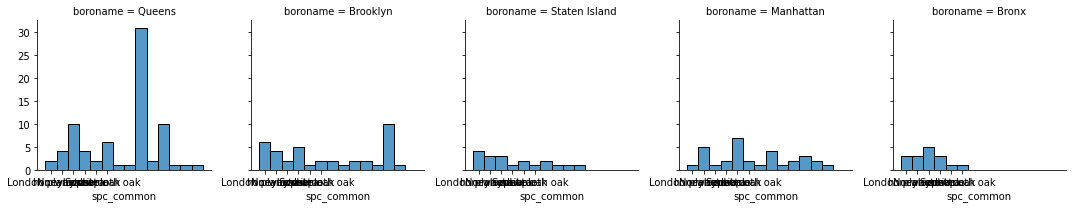

Good


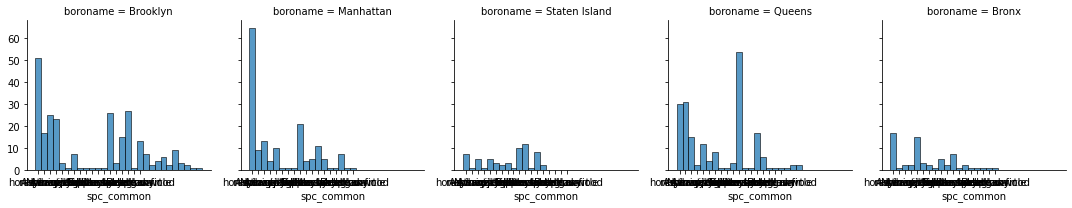

Poor


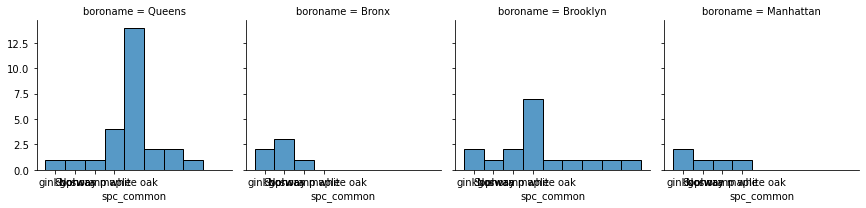

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
counter = range(len(df['health'].unique()))
for i,c in  zip(df['health'].unique(),counter):
    print(i)
    df_graph = df[df['health'] == i]
    df_graph = df_graph.drop("health",axis =1)
    grid = sns.FacetGrid(df_graph,col ='boroname' )
    grid.map(sns.histplot, "spc_common")
    plt.show()

In [87]:
piv_dfs = list()
for i in df['health'].unique():
    df_h = df[df['health'] == i]
    df_r = df_h[['boroname','spc_common']]
    piv_df = pd.pivot_table(df_r,values ='spc_common',index = 'boroname',columns ='spc_common', aggfunc= np.size )
    piv_df = piv_df.fillna(0)
    piv_dfs.append(piv_df)


In [88]:
print(df['health'].unique()[0])
piv_dfs[0]

Fair


spc_common,American elm,American linden,Amur maple,Callery pear,Japanese zelkova,London planetree,Norway maple,Sophora,Turkish hazelnut,crab apple,...,red maple,sawtooth oak,scarlet oak,silver linden,silver maple,swamp white oak,sweetgum,tulip-poplar,white oak,willow oak
boroname,,,,,,,,,,,,,,,,,,,,,
Bronx,0.0,0.0,0.0,0.0,0.0,6.0,10.0,6.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
Brooklyn,0.0,4.0,0.0,0.0,0.0,12.0,20.0,4.0,0.0,2.0,...,0.0,0.0,2.0,2.0,2.0,4.0,0.0,4.0,0.0,0.0
Manhattan,4.0,4.0,0.0,8.0,4.0,10.0,0.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0
Queens,2.0,0.0,4.0,2.0,2.0,8.0,62.0,20.0,0.0,0.0,...,4.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,0.0,0.0
Staten Island,0.0,0.0,2.0,4.0,2.0,8.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0


In [89]:
fair_list = list()
for i in range(5):
    fair_list.append(sum(piv_dfs[0].iloc[i,:].tolist()))

In [90]:
len(fair_list)

5

In [91]:
print(df['health'].unique()[1])
piv_dfs[1]

Good


spc_common,American elm,American linden,Amur maple,Atlantic white cedar,Callery pear,Chinese fringetree,Douglas-fir,Japanese zelkova,Kentucky yellowwood,London planetree,...,scarlet oak,silver linden,silver maple,southern magnolia,swamp white oak,sweetgum,sycamore maple,tulip-poplar,white oak,willow oak
boroname,,,,,,,,,,,,,,,,,,,,,
Bronx,4.0,0.0,0.0,2.0,14.0,0.0,2.0,4.0,2.0,0.0,...,0.0,2.0,0.0,0.0,4.0,2.0,0.0,0.0,4.0,0.0
Brooklyn,0.0,34.0,2.0,0.0,26.0,0.0,0.0,18.0,0.0,50.0,...,14.0,4.0,2.0,2.0,30.0,8.0,2.0,4.0,12.0,6.0
Manhattan,2.0,18.0,0.0,0.0,14.0,0.0,0.0,10.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0
Queens,2.0,8.0,4.0,0.0,12.0,2.0,0.0,2.0,0.0,60.0,...,0.0,2.0,16.0,0.0,4.0,4.0,0.0,6.0,0.0,2.0
Staten Island,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,6.0,0.0,2.0,24.0,2.0,0.0,2.0,2.0


In [92]:
good_list = list()
for i in range(5):
    good_list.append(sum(piv_dfs[1].iloc[i,:].tolist()))

In [93]:
print(df['health'].unique()[2])
piv_dfs[2]

Poor


spc_common,American elm,American linden,Japanese zelkova,London planetree,Norway maple,Sophora,ginkgo,honeylocust,silver linden,swamp white oak,sweetgum,tulip-poplar
boroname,,,,,,,,,,,,
Bronx,4.0,0.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brooklyn,0.0,2.0,2.0,4.0,14.0,0.0,4.0,2.0,0.0,2.0,2.0,2.0
Manhattan,0.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0
Queens,0.0,8.0,0.0,2.0,28.0,4.0,2.0,2.0,2.0,4.0,0.0,0.0


In [94]:
sum(piv_dfs[1].iloc[0,:].tolist())

130.0

In [95]:
len(good_list)

5

In [96]:
poor_list = list()
for i in range(4):
    poor_list.append(sum(piv_dfs[2].iloc[i,:].tolist()))

In [97]:
poor_list.append(0)

In [98]:
len(poor_list)

5

In [99]:
bor = piv_dfs[0].index.tolist()

In [100]:
sum_trees = {'fair' :fair_list,'good' :good_list,'poor' :poor_list}
sum_trees_df = pd.DataFrame(sum_trees, index = bor)

In [101]:
sum_trees_df

,fair,good,poor
Bronx,32.0,130.0,12.0
Brooklyn,78.0,508.0,34.0
Manhattan,64.0,322.0,10.0
Queens,152.0,388.0,52.0
Staten Island,38.0,122.0,0.0


In [102]:
res = sum_trees_df.div(sum_trees_df.sum(axis=1), axis=0)*100

In [103]:
res

,fair,good,poor
Bronx,18.390805,74.712644,6.896552
Brooklyn,12.580645,81.935484,5.483871
Manhattan,16.161616,81.313131,2.525253
Queens,25.675676,65.540541,8.783784
Staten Island,23.750000,76.250000,0.000000


**Question 2:
**Are stewards (steward activity measured by the ‘steward’ variable) having an impact on the health of trees?


In [126]:
trees.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'zipcode',
       'zip_city', 'cb_num', 'borocode', 'boroname', 'cncldist', 'st_assem',
       'st_senate', 'nta', 'nta_name', 'boro_ct', 'state', 'latitude',
       'longitude', 'x_sp', 'y_sp', 'council_district', 'census_tract', 'bin',
       'bbl'],
      dtype='object')

In [127]:
trees.steward

0      None
1      None
2      1or2
3      None
4      None
       ... 
995     NaN
996     NaN
997    1or2
998    None
999    None
Name: steward, Length: 1000, dtype: object

In [128]:
df2 = trees[['spc_common','health','boroname','steward']]
df2

,spc_common,health,boroname,steward
0,red maple,Fair,Queens,None
1,pin oak,Fair,Queens,None
2,honeylocust,Good,Brooklyn,1or2
3,honeylocust,Good,Brooklyn,None
4,American linden,Good,Brooklyn,None
...,...,...,...,...
995,NaN,NaN,Staten Island,NaN
996,NaN,NaN,Staten Island,NaN
997,Norway maple,Poor,Brooklyn,1or2
998,Norway maple,Good,Brooklyn,None


In [129]:
df2.dropna()

,spc_common,health,boroname,steward
0,red maple,Fair,Queens,None
1,pin oak,Fair,Queens,None
2,honeylocust,Good,Brooklyn,1or2
3,honeylocust,Good,Brooklyn,None
4,American linden,Good,Brooklyn,None
...,...,...,...,...
992,northern red oak,Good,Brooklyn,3or4
994,Japanese zelkova,Fair,Staten Island,1or2
997,Norway maple,Poor,Brooklyn,1or2
998,Norway maple,Good,Brooklyn,None


In [130]:
df2[['steward','health']] = df2[['steward','health']].apply(lambda x : pd.factorize(x)[0])


C:\Users\gigig\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:

df2_cor = pd.DataFrame(df2.groupby(['boroname','spc_common']).corr())


In [132]:
df2_cor

health  steward
boroname      spc_common                                    
Bronx         American elm         health   1.00000 -0.57735
                                   steward -0.57735  1.00000
              Atlantic white cedar health       NaN      NaN
                                   steward      NaN      NaN
              Callery pear         health       NaN      NaN
...                                             ...      ...
Staten Island sycamore maple       steward      NaN      NaN
              white oak            health   1.00000 -1.00000
                                   steward -1.00000  1.00000
              willow oak           health       NaN      NaN
                                   steward      NaN      NaN

[214 rows x 2 columns]